# 1. Introduction


This data science project investigates the impact of remote work on mental health among employees across different industries and roles. The dataset includes various factors such as:

Demographics (age, gender, region)

Employment details (job role, work location, industry)

Lifestyle (hours worked, physical activity, sleep quality)

Mental health metrics (conditions, stress levels, access to resources)

Productivity, satisfaction, and social isolation levels

The main goals of this project are:

Explore how remote work correlates with mental health conditions.

Identify patterns in stress, productivity, and work-life balance.

Discover which factors contribute to better mental health in remote environments.

Propose data-driven recommendations to employers and policymakers.

# 2. Data Collection and Loading


In [1]:
import pandas as pd

# Load dataset (replace with actual path)
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

# Preview data with new columns
print(df[['Employee_ID', 'Stress_Level', 'Work_Life_Balance_Rating', 'Job_Role']].head())


  Employee_ID Stress_Level  Work_Life_Balance_Rating           Job_Role
0     EMP0001       Medium                         2                 HR
1     EMP0002       Medium                         1     Data Scientist
2     EMP0003       Medium                         5  Software Engineer
3     EMP0004         High                         4  Software Engineer
4     EMP0005         High                         2              Sales


# 3. Initial Data Inspection & Basic EDA

Dataset shape: (5000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non

<Axes: title={'center': 'Stress Level Distribution'}, xlabel='Stress Level', ylabel='Count'>

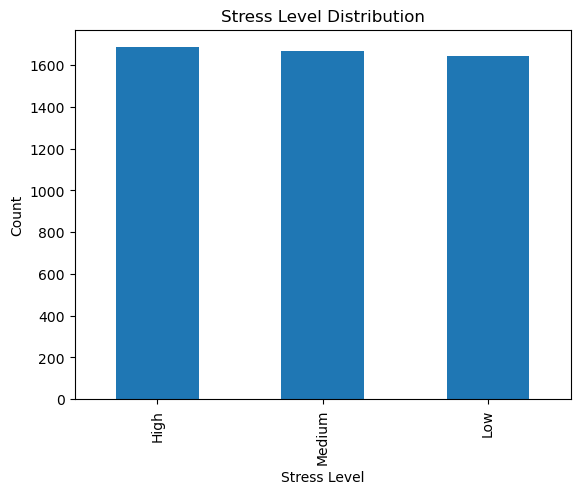

In [2]:
# Basic shape and info
print(f"Dataset shape: {df.shape}")
df.info()

# Check for nulls
print("Missing values:\n", df.isnull().sum())

# Distribution of stress levels
df['Stress_Level'].value_counts().plot(kind='bar', 
                                      title='Stress Level Distribution',
                                      xlabel='Stress Level',
                                      ylabel='Count')


# 4. Data Cleaning

In [3]:
# Drop duplicates and irrelevant columns
df.drop_duplicates(inplace=True)
df.drop(columns=['Employee_ID'], inplace=True)  # Remove unique identifier

# Fill missing values
df['Work_Life_Balance_Rating'].fillna(df['Work_Life_Balance_Rating'].median(), inplace=True)
df['Mental_Health_Condition'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1853077/2792973676.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Life_Balance_Rating'].fillna(df['Work_Life_Balance_Rating'].median(), inplace=True)
/tmp/ipykernel_1853077/2792973676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

# 5. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

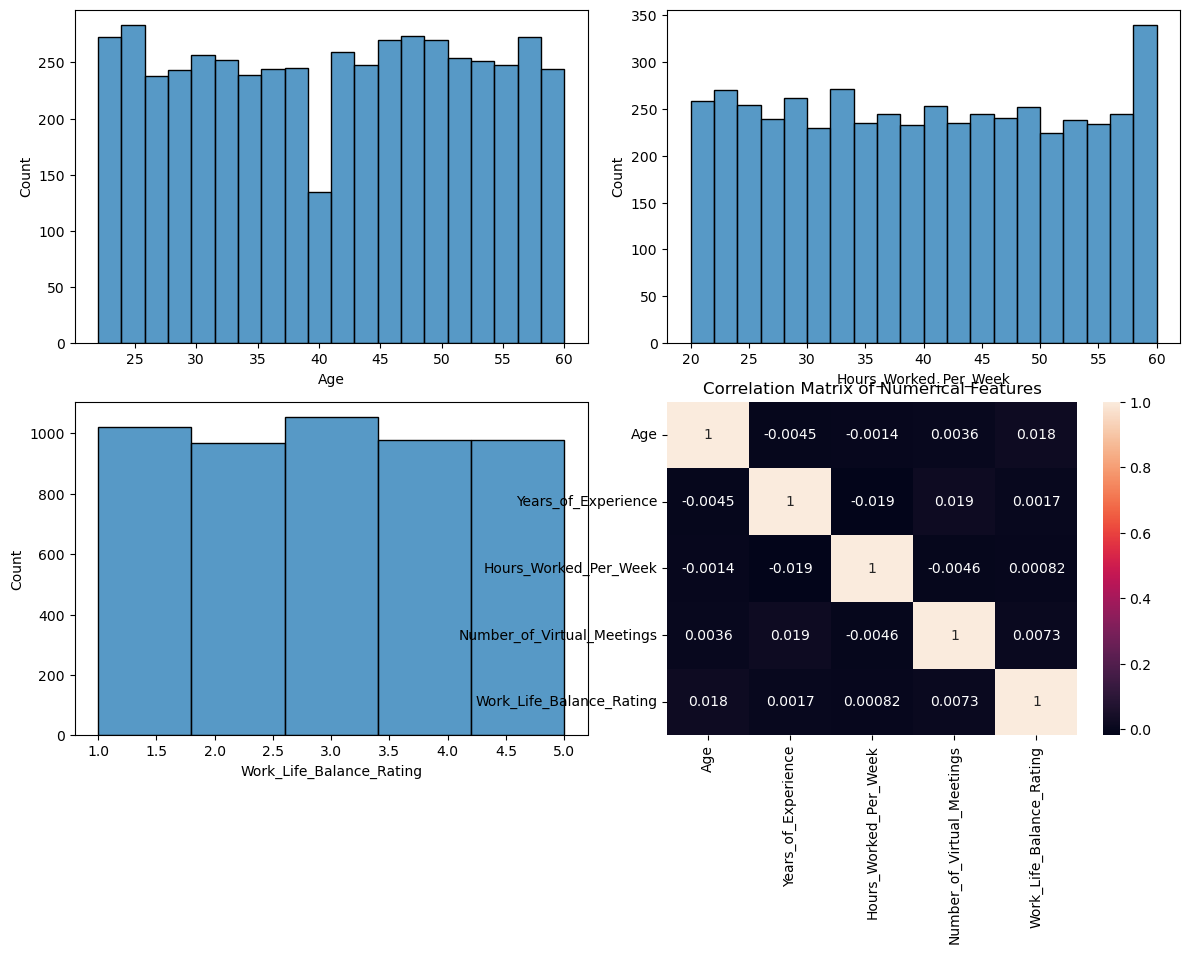

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical features distribution
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Age'], bins=20, ax=ax[0,0])
sns.histplot(df['Hours_Worked_Per_Week'], bins=20, ax=ax[0,1])
sns.histplot(df['Work_Life_Balance_Rating'], bins=5, ax=ax[1,0])
sns.countplot(x='Work_Location', data=df, ax=ax[1,1])
plt.tight_layout()

# Correlation matrix
numerical_cols = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
                 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating']
sns.heatmap(df[numerical_cols].corr(), annot=True)
plt.title('Correlation Matrix of Numerical Features')

# 6. Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features and target
X = df.drop(columns=['Stress_Level'])
y = df['Stress_Level']

# Create preprocessing pipeline
numeric_features = ['Age', 'Hours_Worked_Per_Week']
categorical_features = ['Job_Role', 'Work_Location', 'Company_Support_for_Remote_Work']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# 7. Model Building

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.31      0.32      0.31       335
         Low       0.34      0.36      0.35       326
      Medium       0.36      0.34      0.35       339

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000



# 8. Feature Importance Analysis

Text(0.5, 1.0, 'Top 10 Important Features for Stress Level Prediction')

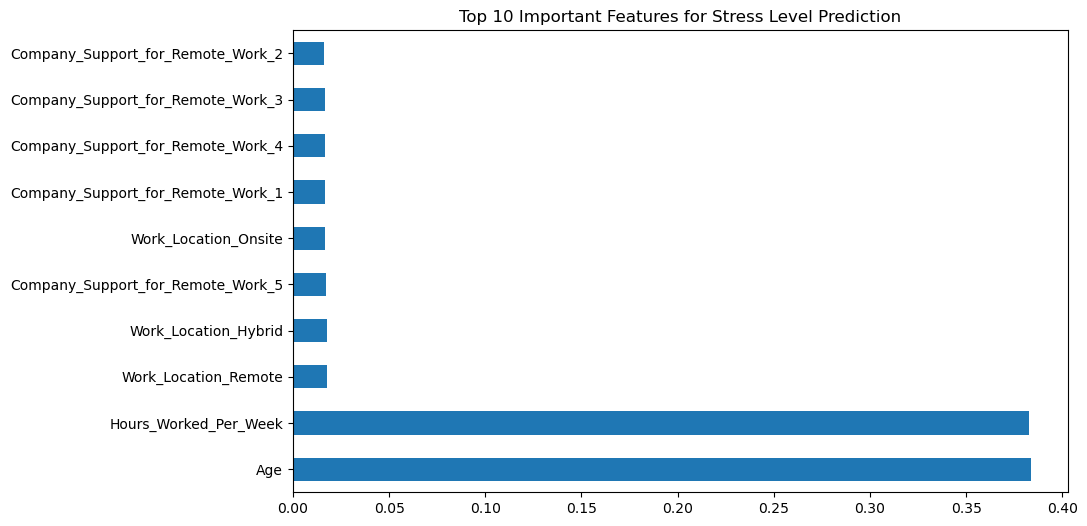

In [7]:
# Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=all_features)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Stress Level Prediction')


# 9. Model Evaluation

Text(0.5, 36.72222222222221, 'Predicted Label')

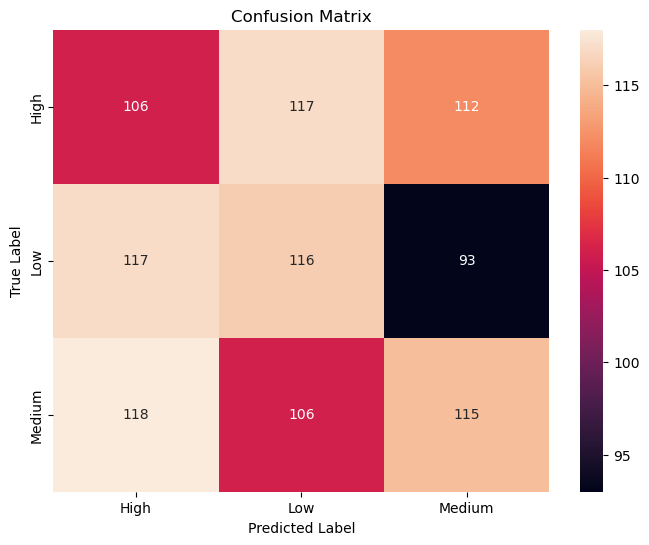

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='d',
           xticklabels=model.classes_,
           yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


# 10. Model Optimization

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                          param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


# 11. Actionable Insights
  insights based on analysis:
- High work hours and poor company support for remote work strongly correlate with high stress levels
- Employees in hybrid work arrangements show better work-life balance ratings
- Technical roles have higher reported stress levels compared to administrative roles
- Recommendation: Implement mandatory work hour limits and improve remote work support systems


# 12. Save Pipeline and Model

In [10]:
import joblib

# Save entire processing pipeline and model
joblib.dump({
    'preprocessor': preprocessor,
    'model': best_model
}, 'employee_stress_analysis_pipeline.pkl')

['employee_stress_analysis_pipeline.pkl']

# 13. Predictive Case Study - Stress Level Prediction for New Employee
 Scenario: Predict stress level for a new employee considering remote work transition
 Employee Profile: 
  - 32-year-old software engineer working 55 hrs/week
  - 8 virtual meetings/week, hybrid work arrangement
  - Reports declining work-life balance (rating=2)
  - Company remote support rating=3


Predicted Stress Level: Medium
Prediction Confidence:
High: 32.9%
Low: 30.7%
Medium: 36.4%


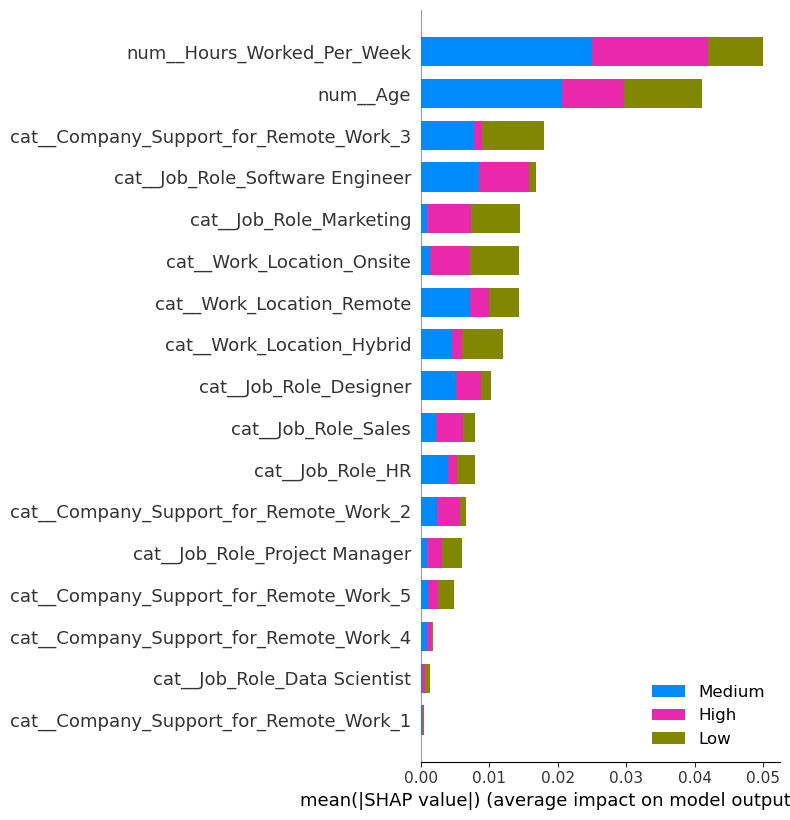

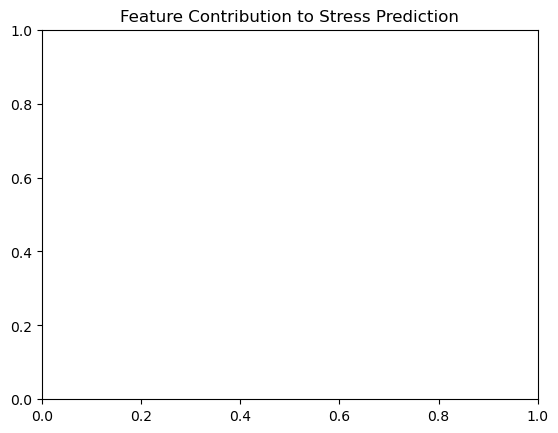

In [11]:
import joblib
import pandas as pd
import shap

# Load saved pipeline
pipeline = joblib.load('employee_stress_analysis_pipeline.pkl')

# Get class labels from trained model
stress_levels = pipeline['model'].classes_

# Create sample employee data
new_employee = pd.DataFrame([{
    'Age': 32,
    'Gender': 'Male',
    'Job_Role': 'Software Engineer',
    'Industry': 'Tech',
    'Years_of_Experience': 6,
    'Work_Location': 'Hybrid',
    'Hours_Worked_Per_Week': 55,
    'Number_of_Virtual_Meetings': 8,
    'Work_Life_Balance_Rating': 2,
    'Mental_Health_Condition': 'Anxiety',
    'Access_to_Mental_Health_Resources': 'Yes',
    'Company_Support_for_Remote_Work': 3,
    'Sleep_Quality': 'Poor',
    'Region': 'North America'
}])

# Preprocess and predict
processed_data = pipeline['preprocessor'].transform(new_employee)
prediction = pipeline['model'].predict(processed_data)
probabilities = pipeline['model'].predict_proba(processed_data)

# Display results using model's class order
print(f"\nPredicted Stress Level: {prediction[0]}")
print("Prediction Confidence:")
for cls, prob in zip(stress_levels, probabilities[0]):
    print(f"{cls}: {prob*100:.1f}%")

# Convert processed data to dense numpy array of floats
processed_data_dense = processed_data.toarray().astype(float)

# Explain prediction using SHAP
explainer = shap.TreeExplainer(pipeline['model'])
shap_values = explainer.shap_values(processed_data_dense)

plt.figure()
shap.summary_plot(shap_values, processed_data_dense,
                 feature_names=pipeline['preprocessor'].get_feature_names_out(),
                 class_names=stress_levels,
                 plot_type='bar')
plt.title("Feature Contribution to Stress Prediction")
plt.show()


# 14. Employee Stress Prediction Web Dashboard

The dashboard is written in python
- **For Testing purpose**
inside your folder containing these codes
- first run this jupyter notebook by choosing --run all cells--
- second, after the model is save, open a terminal from the folder with the codes and model then -
- run
*streamlit run app.py*